<a href="https://colab.research.google.com/github/VikkiSui1129/6289HW/blob/main/HW3_Sui_Vikki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
from time import time
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from datetime import datetime

## inspect the data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/statistical deep learning/hw3/TSLA.csv')
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


## split training and test

In [3]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [4]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 time-steps and 1 output
# lag 1
X_train_1 = []
y_train_1 = []
for i in range(60, 800):
    X_train_1.append(training_set_scaled[i-60:i, 0])
    y_train_1.append(training_set_scaled[i, 0])
X_train_1, y_train_1 = np.array(X_train_1), np.array(y_train_1)
X_train_1 = np.reshape(X_train_1, (X_train_1.shape[0], X_train_1.shape[1], 1))
print(X_train_1.shape, y_train_1.shape)

(740, 60, 1) (740,)


In [6]:
# lag 7
X_train_7 = []
y_train_7 = []
for i in range(66, 800):
    X_train_7.append(training_set_scaled[i-66:i-6, 0])
    y_train_7.append(training_set_scaled[i, 0])
X_train_7, y_train_7 = np.array(X_train_7), np.array(y_train_7)
X_train_7 = np.reshape(X_train_7, (X_train_7.shape[0], X_train_7.shape[1], 1))
print(X_train_7.shape, y_train_7.shape)

(734, 60, 1) (734,)


In [7]:
# lag 14
X_train_14 = []
y_train_14 = []
for i in range(73, 800):
    X_train_14.append(training_set_scaled[i-73:i-13, 0])
    y_train_14.append(training_set_scaled[i, 0])
X_train_14, y_train_14 = np.array(X_train_14), np.array(y_train_14)
X_train_14 = np.reshape(X_train_14, (X_train_14.shape[0], X_train_14.shape[1], 1))
print(X_train_14.shape, y_train_14.shape)

(727, 60, 1) (727,)


## creating the model(lag1)

### SimpleRNN*4, training time: 265.9853446483612s

In [45]:
start = time()
model_1_RNN = Sequential()

#Adding the first SimpleRNN layer and some Dropout regularisation
model_1_RNN.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train_1.shape[1], 1)))
model_1_RNN.add(Dropout(0.2))

# Adding a second SimpleRNN layer and some Dropout regularisation
model_1_RNN.add(SimpleRNN(units = 50, return_sequences = True))
model_1_RNN.add(Dropout(0.2))

# Adding a third SimpleRNN layer and some Dropout regularisation
model_1_RNN.add(SimpleRNN(units = 50, return_sequences = True))
model_1_RNN.add(Dropout(0.2))

# Adding a fourth SimpleRNN layer and some Dropout regularisation
model_1_RNN.add(SimpleRNN(units = 50))
model_1_RNN.add(Dropout(0.2))
# Adding the output layer
model_1_RNN.add(Dense(units = 1))

# Compiling the RNN
model_1_RNN.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_1_RNN.fit(X_train_1, y_train_1, epochs = 100, batch_size = 32)
duration = time()-start

Epoch 1/100
24/24 [==============================] - 5s 68ms/step - loss: 0.4227
Epoch 2/100
24/24 [==============================] - 2s 68ms/step - loss: 0.3115
Epoch 3/100
24/24 [==============================] - 2s 70ms/step - loss: 0.2612
Epoch 4/100
24/24 [==============================] - 2s 66ms/step - loss: 0.2314
Epoch 5/100
24/24 [==============================] - 2s 68ms/step - loss: 0.2292
Epoch 6/100
24/24 [==============================] - 2s 68ms/step - loss: 0.1814
Epoch 7/100
24/24 [==============================] - 2s 67ms/step - loss: 0.1445
Epoch 8/100
24/24 [==============================] - 2s 70ms/step - loss: 0.1316
Epoch 9/100
24/24 [==============================] - 1s 60ms/step - loss: 0.1394
Epoch 10/100
24/24 [==============================] - 1s 60ms/step - loss: 0.1275
Epoch 11/100
24/24 [==============================] - 2s 68ms/step - loss: 0.0992
Epoch 12/100
24/24 [==============================] - 2s 64ms/step - loss: 0.0925
Epoch 13/100
24/24 [=====

In [46]:
print('the training time for this model is:', duration)

the training time for this model is: 265.9853446483612


In [8]:
time_model_1_RNN = 265.9853446483612

In [192]:
# model_1_RNN.save("/content/drive/MyDrive/statistical deep learning/hw3/model_1_RNN.h5")
model_1_RNN = tf.keras.models.load_model('/content/drive/MyDrive/statistical deep learning/hw3/model_1_RNN.h5')

### LSTM*4, training time: 390.2936358451843s

In [48]:
start = time()
model_1_4 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_1_4.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_1.shape[1], 1)))
model_1_4.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_1_4.add(LSTM(units = 50, return_sequences = True))
model_1_4.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_1_4.add(LSTM(units = 50, return_sequences = True))
model_1_4.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_1_4.add(LSTM(units = 50))
model_1_4.add(Dropout(0.2))
# Adding the output layer
model_1_4.add(Dense(units = 1))

# Compiling the RNN
model_1_4.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_1_4.fit(X_train_1, y_train_1, epochs = 100, batch_size = 32)
duration = time()-start

Epoch 1/100
24/24 [==============================] - 11s 136ms/step - loss: 0.0630
Epoch 2/100
24/24 [==============================] - 4s 146ms/step - loss: 0.0185
Epoch 3/100
24/24 [==============================] - 3s 138ms/step - loss: 0.0121
Epoch 4/100
24/24 [==============================] - 3s 129ms/step - loss: 0.0129
Epoch 5/100
24/24 [==============================] - 3s 145ms/step - loss: 0.0120
Epoch 6/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0112
Epoch 7/100
24/24 [==============================] - 3s 134ms/step - loss: 0.0112
Epoch 8/100
24/24 [==============================] - 3s 129ms/step - loss: 0.0104
Epoch 9/100
24/24 [==============================] - 3s 138ms/step - loss: 0.0111
Epoch 10/100
24/24 [==============================] - 3s 141ms/step - loss: 0.0097
Epoch 11/100
24/24 [==============================] - 4s 154ms/step - loss: 0.0100
Epoch 12/100
24/24 [==============================] - 3s 141ms/step - loss: 0.0096
Epoch 13/100

In [49]:
print('the training time for this model is:', duration)

the training time for this model is: 390.2936358451843


In [9]:
time_model_1_4 = 390.2936358451843

In [193]:
# model_1_4.save("/content/drive/MyDrive/statistical deep learning/hw3/model_1_4.h5")
model_1_4 = tf.keras.models.load_model('/content/drive/MyDrive/statistical deep learning/hw3/model_1_4.h5')

### LSTM*6, training time: 577.8241760730743s

In [51]:
start = time()
model_1_6 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_1_6.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_1.shape[1], 1)))
model_1_6.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_1_6.add(LSTM(units = 50, return_sequences = True))
model_1_6.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_1_6.add(LSTM(units = 50, return_sequences = True))
model_1_6.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_1_6.add(LSTM(units = 50, return_sequences = True))
model_1_6.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model_1_6.add(LSTM(units = 50, return_sequences = True))
model_1_6.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model_1_6.add(LSTM(units = 50))
model_1_6.add(Dropout(0.2))
# Adding the output layer
model_1_6.add(Dense(units = 1))

# Compiling the RNN
model_1_6.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_1_6.fit(X_train_1, y_train_1, epochs = 100, batch_size = 32)
duration = time()-start

Epoch 1/100
24/24 [==============================] - 19s 206ms/step - loss: 0.0847
Epoch 2/100
24/24 [==============================] - 5s 207ms/step - loss: 0.0241
Epoch 3/100
24/24 [==============================] - 5s 200ms/step - loss: 0.0172
Epoch 4/100
24/24 [==============================] - 7s 298ms/step - loss: 0.0148
Epoch 5/100
24/24 [==============================] - 5s 212ms/step - loss: 0.0149
Epoch 6/100
24/24 [==============================] - 5s 194ms/step - loss: 0.0156
Epoch 7/100
24/24 [==============================] - 5s 203ms/step - loss: 0.0148
Epoch 8/100
24/24 [==============================] - 5s 207ms/step - loss: 0.0162
Epoch 9/100
24/24 [==============================] - 5s 221ms/step - loss: 0.0155
Epoch 10/100
24/24 [==============================] - 5s 211ms/step - loss: 0.0139
Epoch 11/100
24/24 [==============================] - 7s 296ms/step - loss: 0.0136
Epoch 12/100
24/24 [==============================] - 5s 208ms/step - loss: 0.0125
Epoch 13/100

In [52]:
print('the training time for this model is:', duration)

the training time for this model is: 577.8241760730743


In [10]:
time_model_1_6 = 577.8241760730743

In [194]:
# model_1_6.save("/content/drive/MyDrive/statistical deep learning/hw3/model_1_6.h5")
model_1_6 = tf.keras.models.load_model('/content/drive/MyDrive/statistical deep learning/hw3/model_1_6.h5')

### GRU*4, training time: 511.0808436870575s

In [65]:
start = time()
model_1_GRU = Sequential()
#Adding the first GRU layer and some Dropout regularisation
model_1_GRU.add(GRU(units = 50, return_sequences = True, input_shape = (X_train_1.shape[1], 1)))
model_1_GRU.add(Dropout(0.2))
# Adding a second GRU layer and some Dropout regularisation
model_1_GRU.add(GRU(units = 50, return_sequences = True))
model_1_GRU.add(Dropout(0.2))
# Adding a third GRU layer and some Dropout regularisation
model_1_GRU.add(GRU(units = 50, return_sequences = True))
model_1_GRU.add(Dropout(0.2))
# Adding a fourth GRU layer and some Dropout regularisation
model_1_GRU.add(GRU(units = 50))
model_1_GRU.add(Dropout(0.2))
# Adding the output layer
model_1_GRU.add(Dense(units = 1))

# Compiling the RNN
model_1_GRU.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_1_GRU.fit(X_train_1, y_train_1, epochs = 100, batch_size = 32)
duration = time()-start

Epoch 1/100
24/24 [==============================] - 13s 141ms/step - loss: 0.0765
Epoch 2/100
24/24 [==============================] - 3s 143ms/step - loss: 0.0142
Epoch 3/100
24/24 [==============================] - 3s 128ms/step - loss: 0.0098
Epoch 4/100
24/24 [==============================] - 6s 237ms/step - loss: 0.0083
Epoch 5/100
24/24 [==============================] - 4s 182ms/step - loss: 0.0077
Epoch 6/100
24/24 [==============================] - 5s 191ms/step - loss: 0.0084
Epoch 7/100
24/24 [==============================] - 7s 277ms/step - loss: 0.0072
Epoch 8/100
24/24 [==============================] - 8s 333ms/step - loss: 0.0070
Epoch 9/100
24/24 [==============================] - 4s 147ms/step - loss: 0.0065
Epoch 10/100
24/24 [==============================] - 5s 195ms/step - loss: 0.0061
Epoch 11/100
24/24 [==============================] - 5s 202ms/step - loss: 0.0065
Epoch 12/100
24/24 [==============================] - 6s 242ms/step - loss: 0.0054
Epoch 13/100

In [66]:
print('the training time for this model is:', duration)

the training time for this model is: 511.0808436870575


In [11]:
time_model_1_GRU = 511.0808436870575

In [195]:
# model_1_GRU.save("/content/drive/MyDrive/statistical deep learning/hw3/model_1_GRU.h5")
model_1_GRU = tf.keras.models.load_model('/content/drive/MyDrive/statistical deep learning/hw3/model_1_GRU.h5')

### making prediction

In [198]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test_1 = []
for i in range(60, 519):
    X_test_1.append(inputs[i-60:i, 0])
X_test_1 = np.array(X_test_1)
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
print(X_test_1.shape)
# (459, 60, 1)

(459, 60, 1)


In [201]:
len(future_1_RNN)

559

In [196]:
# date1 = df.loc[800:, 'Date'].tolist()
date = pd.date_range(start="2020-07-10",end="2020-10-17")
date = list(date.strftime("%Y-%m-%d"))

In [200]:
# lag1, 4 SimpleRNN layer
predicted_stock_price_1_RNN = model_1_RNN.predict(X_test_1)
predicted_stock_price_1_RNN = sc.inverse_transform(predicted_stock_price_1_RNN)

future_1_RNN = sc.transform(dataset_test.values).copy()
for i in range(100):
    future_1_RNN = np.append(future_1_RNN, model_1_RNN.predict(future_1_RNN[-60:].reshape(1,-1,1))[0][0])
future_1_RNN = sc.inverse_transform(future_1_RNN.reshape(-1,1))

In [207]:
# lag1, 4 LSTM layer
predicted_stock_price_1_4 = model_1_4.predict(X_test_1)
predicted_stock_price_1_4 = sc.inverse_transform(predicted_stock_price_1_4)

future_1_4 = sc.transform(dataset_test.values).copy()
for i in range(100):
    future_1_4 = np.append(future_1_4, model_1_4.predict(future_1_4[-60:].reshape(1,-1,1))[0][0])
future_1_4 = sc.inverse_transform(future_1_4.reshape(-1,1))

In [208]:
# lag1, 6 LSTM layer
predicted_stock_price_1_6 = model_1_6.predict(X_test_1)
predicted_stock_price_1_6 = sc.inverse_transform(predicted_stock_price_1_6)

future_1_6 = sc.transform(dataset_test.values).copy()
for i in range(100):
    future_1_6 = np.append(future_1_6, model_1_6.predict(future_1_6[-60:].reshape(1,-1,1))[0][0])
future_1_6 = sc.inverse_transform(future_1_6.reshape(-1,1))

In [209]:
# lag1, 4 GRU layer
predicted_stock_price_1_GRU = model_1_GRU.predict(X_test_1)
predicted_stock_price_1_GRU = sc.inverse_transform(predicted_stock_price_1_GRU)

future_1_GRU = sc.transform(dataset_test.values).copy()
for i in range(100):
    future_1_GRU = np.append(future_1_GRU, model_1_GRU.predict(future_1_GRU[-60:].reshape(1,-1,1))[0][0])
future_1_GRU = sc.inverse_transform(future_1_GRU.reshape(-1,1))

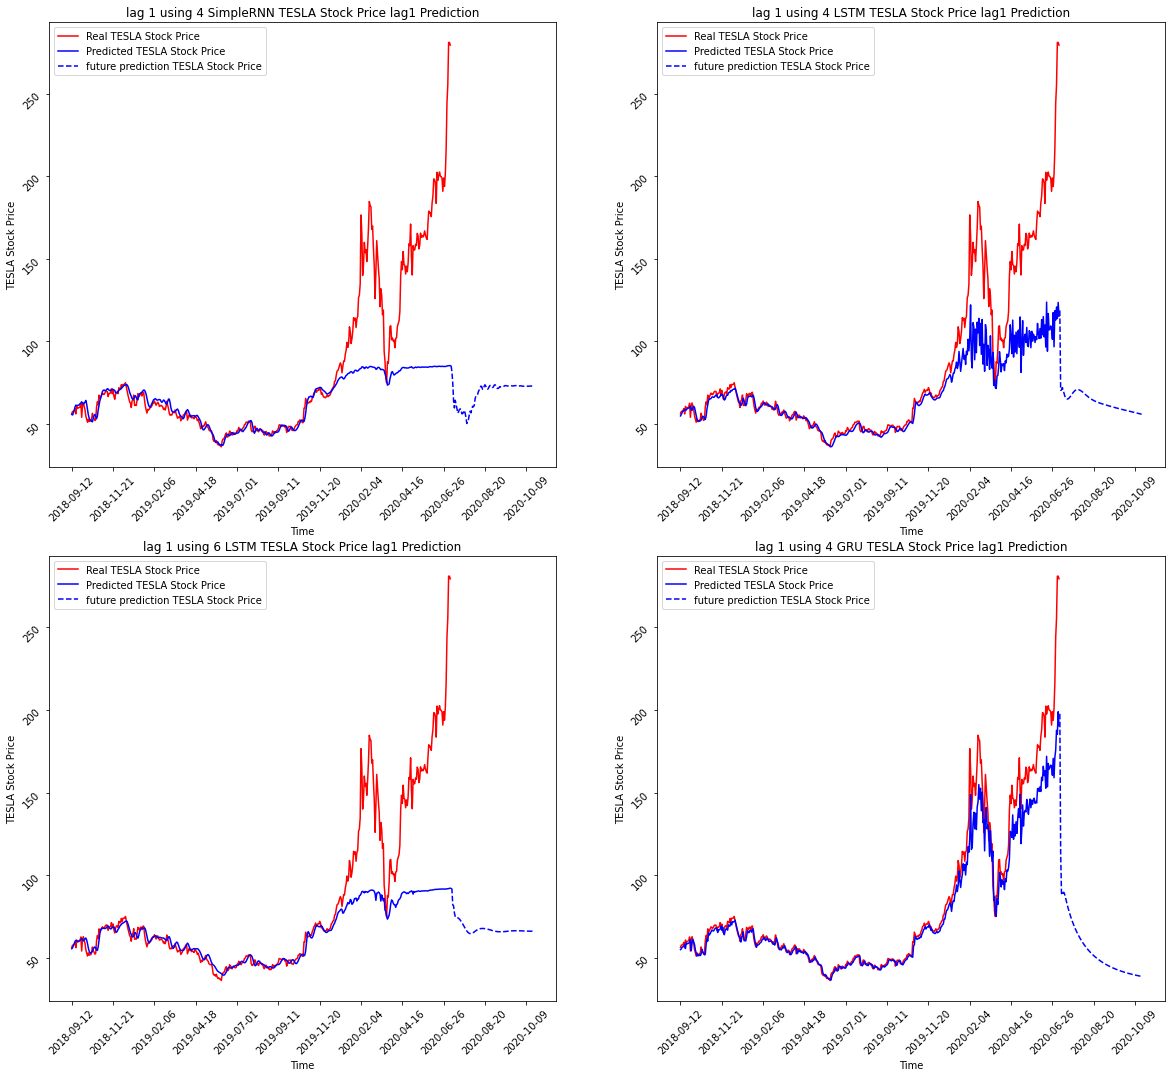

In [231]:
# Visualising the results
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,18))
axs[0,0].plot(df.loc[800:, 'Date'].tolist(), dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
axs[0,0].plot(df.loc[800:, 'Date'].tolist(), predicted_stock_price_1_RNN, color = 'blue', label = 'Predicted TESLA Stock Price')
axs[0,0].plot(date, future_1_RNN[459:], '--', color = 'blue', label = 'future prediction TESLA Stock Price')
axs[0,0].set_xticks(np.arange(0,559,50))
axs[0,0].set_title('lag 1 using 4 SimpleRNN TESLA Stock Price lag1 Prediction')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylabel('TESLA Stock Price')
axs[0,0].tick_params(labelrotation=45)
axs[0,0].legend()

axs[0,1].plot(df.loc[800:, 'Date'].tolist(), dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
axs[0,1].plot(df.loc[800:, 'Date'].tolist(), predicted_stock_price_1_4, color = 'blue', label = 'Predicted TESLA Stock Price')
axs[0,1].plot(date, future_1_4[459:], '--', color = 'blue', label = 'future prediction TESLA Stock Price')
axs[0,1].set_xticks(np.arange(0,559,50))
axs[0,1].set_title('lag 1 using 4 LSTM TESLA Stock Price lag1 Prediction')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylabel('TESLA Stock Price')
axs[0,1].tick_params(labelrotation=45)
axs[0,1].legend()

axs[1,0].plot(df.loc[800:, 'Date'].tolist(), dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
axs[1,0].plot(df.loc[800:, 'Date'].tolist(), predicted_stock_price_1_6, color = 'blue', label = 'Predicted TESLA Stock Price')
axs[1,0].plot(date, future_1_6[459:], '--', color = 'blue', label = 'future prediction TESLA Stock Price')
axs[1,0].set_xticks(np.arange(0,559,50))
axs[1,0].set_title('lag 1 using 6 LSTM TESLA Stock Price lag1 Prediction')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylabel('TESLA Stock Price')
axs[1,0].tick_params(labelrotation=45)
axs[1,0].legend()

axs[1,1].plot(df.loc[800:, 'Date'].tolist(), dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
axs[1,1].plot(df.loc[800:, 'Date'].tolist(), predicted_stock_price_1_GRU, color = 'blue', label = 'Predicted TESLA Stock Price')
axs[1,1].plot(date, future_1_GRU[459:], '--', color = 'blue', label = 'future prediction TESLA Stock Price')
axs[1,1].set_xticks(np.arange(0,559,50))
axs[1,1].set_title('lag 1 using 4 GRU TESLA Stock Price lag1 Prediction')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylabel('TESLA Stock Price')
axs[1,1].tick_params(labelrotation=45)
axs[1,1].legend()

## creating the model(lag7)

### SimpleRNN*4, training time: 206.35389113426208s

In [74]:
start = time()
model_7_RNN = Sequential()

#Adding the first SimpleRNN layer and some Dropout regularisation
model_7_RNN.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train_7.shape[1], 1)))
model_7_RNN.add(Dropout(0.2))

# Adding a second SimpleRNN layer and some Dropout regularisation
model_7_RNN.add(SimpleRNN(units = 50, return_sequences = True))
model_7_RNN.add(Dropout(0.2))

# Adding a third SimpleRNN layer and some Dropout regularisation
model_7_RNN.add(SimpleRNN(units = 50, return_sequences = True))
model_7_RNN.add(Dropout(0.2))

# Adding a fourth SimpleRNN layer and some Dropout regularisation
model_7_RNN.add(SimpleRNN(units = 50))
model_7_RNN.add(Dropout(0.2))
# Adding the output layer
model_7_RNN.add(Dense(units = 1))

# Compiling the RNN
model_7_RNN.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_7_RNN.fit(X_train_7, y_train_7, epochs = 100, batch_size = 32)
duration = time()-start

Epoch 1/100
23/23 [==============================] - 6s 74ms/step - loss: 0.4276
Epoch 2/100
23/23 [==============================] - 2s 74ms/step - loss: 0.2624
Epoch 3/100
23/23 [==============================] - 2s 68ms/step - loss: 0.2154
Epoch 4/100
23/23 [==============================] - 2s 70ms/step - loss: 0.1974
Epoch 5/100
23/23 [==============================] - 1s 63ms/step - loss: 0.1660
Epoch 6/100
23/23 [==============================] - 1s 64ms/step - loss: 0.1449
Epoch 7/100
23/23 [==============================] - 2s 73ms/step - loss: 0.1102
Epoch 8/100
23/23 [==============================] - 2s 66ms/step - loss: 0.1157
Epoch 9/100
23/23 [==============================] - 2s 69ms/step - loss: 0.0969
Epoch 10/100
23/23 [==============================] - 2s 68ms/step - loss: 0.0913
Epoch 11/100
23/23 [==============================] - 2s 67ms/step - loss: 0.0820
Epoch 12/100
23/23 [==============================] - 2s 66ms/step - loss: 0.0853
Epoch 13/100
23/23 [=====

In [75]:
print('the training time for this model is:', duration)

the training time for this model is: 206.35389113426208


In [12]:
time_model_7_RNN = 206.35389113426208

In [213]:
# model_7_RNN.save("/content/drive/MyDrive/statistical deep learning/hw3/model_7_RNN.h5")
model_7_RNN = tf.keras.models.load_model('/content/drive/MyDrive/statistical deep learning/hw3/model_7_RNN.h5')

### LSTM*4, training time: 390.1118619441986s

In [77]:
start = time()
model_7_4 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_7_4.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_1.shape[1], 1)))
model_7_4.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_7_4.add(LSTM(units = 50, return_sequences = True))
model_7_4.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_7_4.add(LSTM(units = 50, return_sequences = True))
model_7_4.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_7_4.add(LSTM(units = 50))
model_7_4.add(Dropout(0.2))
# Adding the output layer
model_7_4.add(Dense(units = 1))

# Compiling the RNN
model_7_4.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_7_4.fit(X_train_7, y_train_7, epochs = 100, batch_size = 32)
duration = time()-start

Epoch 1/100
23/23 [==============================] - 11s 154ms/step - loss: 0.0723
Epoch 2/100
23/23 [==============================] - 3s 145ms/step - loss: 0.0217
Epoch 3/100
23/23 [==============================] - 3s 140ms/step - loss: 0.0155
Epoch 4/100
23/23 [==============================] - 3s 150ms/step - loss: 0.0161
Epoch 5/100
23/23 [==============================] - 3s 137ms/step - loss: 0.0153
Epoch 6/100
23/23 [==============================] - 3s 137ms/step - loss: 0.0148
Epoch 7/100
23/23 [==============================] - 3s 130ms/step - loss: 0.0153
Epoch 8/100
23/23 [==============================] - 3s 138ms/step - loss: 0.0154
Epoch 9/100
23/23 [==============================] - 3s 138ms/step - loss: 0.0149
Epoch 10/100
23/23 [==============================] - 3s 152ms/step - loss: 0.0143
Epoch 11/100
23/23 [==============================] - 3s 148ms/step - loss: 0.0150
Epoch 12/100
23/23 [==============================] - 3s 129ms/step - loss: 0.0146
Epoch 13/100

In [78]:
print('the training time for this model is:', duration)

the training time for this model is: 390.1118619441986


In [13]:
time_model_7_4 = 390.1118619441986

In [214]:
# model_7_4.save("/content/drive/MyDrive/statistical deep learning/hw3/model_7_4.h5")
model_7_4 = tf.keras.models.load_model('/content/drive/MyDrive/statistical deep learning/hw3/model_7_4.h5')

### LSTM*6, training time: 515.3654239177704

In [80]:
start = time()
model_7_6 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_7_6.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_1.shape[1], 1)))
model_7_6.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_7_6.add(LSTM(units = 50, return_sequences = True))
model_7_6.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_7_6.add(LSTM(units = 50, return_sequences = True))
model_7_6.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_7_6.add(LSTM(units = 50, return_sequences = True))
model_7_6.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model_7_6.add(LSTM(units = 50, return_sequences = True))
model_7_6.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model_7_6.add(LSTM(units = 50))
model_7_6.add(Dropout(0.2))
# Adding the output layer
model_7_6.add(Dense(units = 1))

# Compiling the RNN
model_7_6.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_7_6.fit(X_train_7, y_train_7, epochs = 100, batch_size = 32)
duration = time()-start

Epoch 1/100
23/23 [==============================] - 18s 203ms/step - loss: 0.0778
Epoch 2/100
23/23 [==============================] - 5s 202ms/step - loss: 0.0239
Epoch 3/100
23/23 [==============================] - 5s 204ms/step - loss: 0.0183
Epoch 4/100
23/23 [==============================] - 5s 199ms/step - loss: 0.0190
Epoch 5/100
23/23 [==============================] - 5s 204ms/step - loss: 0.0201
Epoch 6/100
23/23 [==============================] - 5s 205ms/step - loss: 0.0194
Epoch 7/100
23/23 [==============================] - 5s 220ms/step - loss: 0.0165
Epoch 8/100
23/23 [==============================] - 5s 201ms/step - loss: 0.0184
Epoch 9/100
23/23 [==============================] - 5s 213ms/step - loss: 0.0170
Epoch 10/100
23/23 [==============================] - 5s 211ms/step - loss: 0.0173
Epoch 11/100
23/23 [==============================] - 5s 206ms/step - loss: 0.0160
Epoch 12/100
23/23 [==============================] - 5s 197ms/step - loss: 0.0170
Epoch 13/100

In [81]:
print('the training time for this model is:', duration)

the training time for this model is: 515.3654239177704


In [14]:
time_model_7_6 = 515.3654239177704

In [215]:
# model_7_6.save("/content/drive/MyDrive/statistical deep learning/hw3/model_7_6.h5")
model_7_6 = tf.keras.models.load_model('/content/drive/MyDrive/statistical deep learning/hw3/model_7_6.h5')

### GRU*4, training time: 329.90419340133667s

In [83]:
start = time()
model_7_GRU = Sequential()
#Adding the first GRU layer and some Dropout regularisation
model_7_GRU.add(GRU(units = 50, return_sequences = True, input_shape = (X_train_1.shape[1], 1)))
model_7_GRU.add(Dropout(0.2))
# Adding a second GRU layer and some Dropout regularisation
model_7_GRU.add(GRU(units = 50, return_sequences = True))
model_7_GRU.add(Dropout(0.2))
# Adding a third GRU layer and some Dropout regularisation
model_7_GRU.add(GRU(units = 50, return_sequences = True))
model_7_GRU.add(Dropout(0.2))
# Adding a fourth GRU layer and some Dropout regularisation
model_7_GRU.add(GRU(units = 50))
model_7_GRU.add(Dropout(0.2))
# Adding the output layer
model_7_GRU.add(Dense(units = 1))

# Compiling the RNN
model_7_GRU.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_7_GRU.fit(X_train_7, y_train_7, epochs = 100, batch_size = 32)
duration = time()-start

Epoch 1/100
23/23 [==============================] - 11s 148ms/step - loss: 0.0603
Epoch 2/100
23/23 [==============================] - 3s 145ms/step - loss: 0.0156
Epoch 3/100
23/23 [==============================] - 3s 132ms/step - loss: 0.0143
Epoch 4/100
23/23 [==============================] - 3s 137ms/step - loss: 0.0119
Epoch 5/100
23/23 [==============================] - 3s 133ms/step - loss: 0.0127
Epoch 6/100
23/23 [==============================] - 3s 135ms/step - loss: 0.0131
Epoch 7/100
23/23 [==============================] - 3s 150ms/step - loss: 0.0125
Epoch 8/100
23/23 [==============================] - 3s 140ms/step - loss: 0.0126
Epoch 9/100
23/23 [==============================] - 3s 136ms/step - loss: 0.0125
Epoch 10/100
23/23 [==============================] - 3s 135ms/step - loss: 0.0131
Epoch 11/100
23/23 [==============================] - 3s 131ms/step - loss: 0.0124
Epoch 12/100
23/23 [==============================] - 3s 134ms/step - loss: 0.0124
Epoch 13/100

In [84]:
print('the training time for this model is:', duration)

the training time for this model is: 329.90419340133667


In [15]:
time_model_7_GRU = 329.90419340133667

In [216]:
# model_7_GRU.save("/content/drive/MyDrive/statistical deep learning/hw3/model_7_GRU.h5")
model_7_GRU = tf.keras.models.load_model('/content/drive/MyDrive/statistical deep learning/hw3/model_7_GRU.h5')

### making prediction

In [217]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
# print(len(inputs))
X_test_7 = []
for i in range(60, 513):
    X_test_7.append(inputs[i-60:i, 0])
X_test_7 = np.array(X_test_7)
X_test_7 = np.reshape(X_test_7, (X_test_7.shape[0], X_test_7.shape[1], 1))
print(X_test_7.shape)
# (453, 60, 1)

(453, 60, 1)


In [219]:
# lag7, 4 SimpleRNN layer
predicted_stock_price_7_RNN = model_7_RNN.predict(X_test_7)
predicted_stock_price_7_RNN = sc.inverse_transform(predicted_stock_price_7_RNN)

future_7_RNN = sc.transform(dataset_test.values).copy()
for i in range(100):
    future_7_RNN = np.append(future_7_RNN, model_7_RNN.predict(future_7_RNN[-66:-6].reshape(1,-1,1))[0][0])
future_7_RNN = sc.inverse_transform(future_7_RNN.reshape(-1,1))

In [222]:
# lag7, 4 LSTM layer
predicted_stock_price_7_4 = model_7_4.predict(X_test_7)
predicted_stock_price_7_4 = sc.inverse_transform(predicted_stock_price_7_4)

future_7_4 = sc.transform(dataset_test.values).copy()
for i in range(100):
    future_7_4 = np.append(future_7_4, model_7_4.predict(future_7_4[-66:-6].reshape(1,-1,1))[0][0])
future_7_4 = sc.inverse_transform(future_7_4.reshape(-1,1))

In [223]:
# lag7, 6 LSTM layer
predicted_stock_price_7_6 = model_7_6.predict(X_test_7)
predicted_stock_price_7_6 = sc.inverse_transform(predicted_stock_price_7_6)

future_7_6 = sc.transform(dataset_test.values).copy()
for i in range(100):
    future_7_6 = np.append(future_7_6, model_7_6.predict(future_7_6[-66:-6].reshape(1,-1,1))[0][0])
future_7_6 = sc.inverse_transform(future_7_6.reshape(-1,1))

In [224]:
# lag7, 4 GRU layer
predicted_stock_price_7_GRU = model_7_GRU.predict(X_test_7)
predicted_stock_price_7_GRU = sc.inverse_transform(predicted_stock_price_7_GRU)

future_7_GRU = sc.transform(dataset_test.values).copy()
for i in range(100):
    future_7_GRU = np.append(future_7_GRU, model_7_GRU.predict(future_7_GRU[-66:-6].reshape(1,-1,1))[0][0])
future_7_GRU = sc.inverse_transform(future_7_GRU.reshape(-1,1))

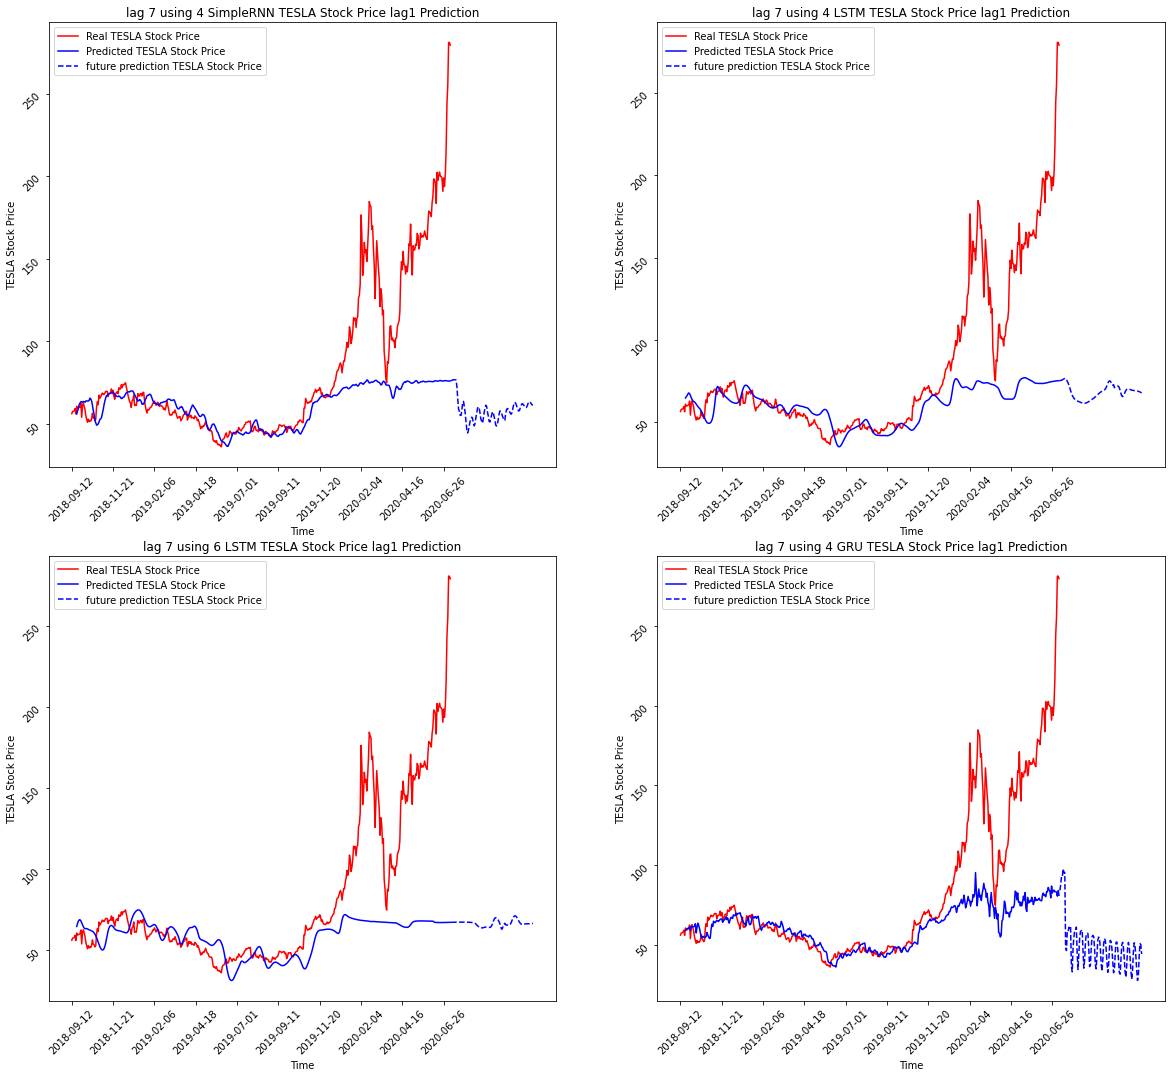

In [232]:
# Visualising the results
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,18))
axs[0,0].plot(df.loc[800:, 'Date'].tolist(), dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
axs[0,0].plot(df.loc[806:, 'Date'].tolist(), predicted_stock_price_7_RNN, color = 'blue', label = 'Predicted TESLA Stock Price')
axs[0,0].plot(date, future_7_RNN[459:], '--', color = 'blue',label = 'future prediction TESLA Stock Price')
axs[0,0].set_xticks(np.arange(0,459,50))
axs[0,0].set_title('lag 7 using 4 SimpleRNN TESLA Stock Price lag1 Prediction')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylabel('TESLA Stock Price')
axs[0,0].tick_params(labelrotation=45)
axs[0,0].legend()

axs[0,1].plot(df.loc[800:, 'Date'].tolist(), dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
axs[0,1].plot(df.loc[806:, 'Date'].tolist(), predicted_stock_price_7_4, color = 'blue', label = 'Predicted TESLA Stock Price')
axs[0,1].plot(date, future_7_4[459:], '--', color = 'blue',label = 'future prediction TESLA Stock Price')
axs[0,1].set_xticks(np.arange(0,459,50))
axs[0,1].set_title('lag 7 using 4 LSTM TESLA Stock Price lag1 Prediction')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylabel('TESLA Stock Price')
axs[0,1].tick_params(labelrotation=45)
axs[0,1].legend()

axs[1,0].plot(df.loc[800:, 'Date'].tolist(), dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
axs[1,0].plot(df.loc[806:, 'Date'].tolist(), predicted_stock_price_7_6, color = 'blue', label = 'Predicted TESLA Stock Price')
axs[1,0].plot(date, future_7_6[459:], '--', color = 'blue',label = 'future prediction TESLA Stock Price')
axs[1,0].set_xticks(np.arange(0,459,50))
axs[1,0].set_title('lag 7 using 6 LSTM TESLA Stock Price lag1 Prediction')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylabel('TESLA Stock Price')
axs[1,0].tick_params(labelrotation=45)
axs[1,0].legend()

axs[1,1].plot(df.loc[800:, 'Date'].tolist(), dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
axs[1,1].plot(df.loc[806:, 'Date'].tolist(), predicted_stock_price_7_GRU, color = 'blue', label = 'Predicted TESLA Stock Price')
axs[1,1].plot(date, future_7_GRU[459:], '--', color = 'blue',label = 'future prediction TESLA Stock Price')
axs[1,1].set_xticks(np.arange(0,459,50))
axs[1,1].set_title('lag 7 using 4 GRU TESLA Stock Price lag1 Prediction')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylabel('TESLA Stock Price')
axs[1,1].tick_params(labelrotation=45)
axs[1,1].legend()

## creating the model(lag14)

### SimpleRNN*4, training time: 142.9534592628479s

In [92]:
start = time()
model_14_RNN = Sequential()

#Adding the first SimpleRNN layer and some Dropout regularisation
model_14_RNN.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train_7.shape[1], 1)))
model_14_RNN.add(Dropout(0.2))

# Adding a second SimpleRNN layer and some Dropout regularisation
model_14_RNN.add(SimpleRNN(units = 50, return_sequences = True))
model_14_RNN.add(Dropout(0.2))

# Adding a third SimpleRNN layer and some Dropout regularisation
model_14_RNN.add(SimpleRNN(units = 50, return_sequences = True))
model_14_RNN.add(Dropout(0.2))

# Adding a fourth SimpleRNN layer and some Dropout regularisation
model_14_RNN.add(SimpleRNN(units = 50))
model_14_RNN.add(Dropout(0.2))
# Adding the output layer
model_14_RNN.add(Dense(units = 1))

# Compiling the RNN
model_14_RNN.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_14_RNN.fit(X_train_14, y_train_14, epochs = 100, batch_size = 32)
duration = time()-start

Epoch 1/100
23/23 [==============================] - 4s 62ms/step - loss: 0.4954
Epoch 2/100
23/23 [==============================] - 1s 62ms/step - loss: 0.3185
Epoch 3/100
23/23 [==============================] - 1s 61ms/step - loss: 0.2753
Epoch 4/100
23/23 [==============================] - 1s 62ms/step - loss: 0.2220
Epoch 5/100
23/23 [==============================] - 1s 58ms/step - loss: 0.2221
Epoch 6/100
23/23 [==============================] - 1s 62ms/step - loss: 0.1844
Epoch 7/100
23/23 [==============================] - 1s 60ms/step - loss: 0.1832
Epoch 8/100
23/23 [==============================] - 1s 61ms/step - loss: 0.1509
Epoch 9/100
23/23 [==============================] - 1s 60ms/step - loss: 0.1260
Epoch 10/100
23/23 [==============================] - 1s 58ms/step - loss: 0.1093
Epoch 11/100
23/23 [==============================] - 1s 61ms/step - loss: 0.1081
Epoch 12/100
23/23 [==============================] - 1s 59ms/step - loss: 0.0953
Epoch 13/100
23/23 [=====

In [93]:
print('the training time for this model is:', duration)

the training time for this model is: 142.9534592628479


In [16]:
time_model_14_RNN = 142.9534592628479

In [17]:
# model_14_RNN.save("/content/drive/MyDrive/statistical deep learning/hw3/model_14_RNN.h5")
model_14_RNN = tf.keras.models.load_model('/content/drive/MyDrive/statistical deep learning/hw3/model_14_RNN.h5')

### LSTM*4, training time: 330.1862096786499s

In [95]:
start = time()
model_14_4 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_14_4.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_1.shape[1], 1)))
model_14_4.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_14_4.add(LSTM(units = 50, return_sequences = True))
model_14_4.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_14_4.add(LSTM(units = 50, return_sequences = True))
model_14_4.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_14_4.add(LSTM(units = 50))
model_14_4.add(Dropout(0.2))
# Adding the output layer
model_14_4.add(Dense(units = 1))

# Compiling the RNN
model_14_4.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_14_4.fit(X_train_14, y_train_14, epochs = 100, batch_size = 32)
duration = time()-start

Epoch 1/100
23/23 [==============================] - 11s 129ms/step - loss: 0.0884
Epoch 2/100
23/23 [==============================] - 3s 130ms/step - loss: 0.0225
Epoch 3/100
23/23 [==============================] - 3s 133ms/step - loss: 0.0195
Epoch 4/100
23/23 [==============================] - 3s 127ms/step - loss: 0.0198
Epoch 5/100
23/23 [==============================] - 3s 125ms/step - loss: 0.0201
Epoch 6/100
23/23 [==============================] - 3s 127ms/step - loss: 0.0173
Epoch 7/100
23/23 [==============================] - 3s 133ms/step - loss: 0.0193
Epoch 8/100
23/23 [==============================] - 3s 131ms/step - loss: 0.0174
Epoch 9/100
23/23 [==============================] - 3s 129ms/step - loss: 0.0175
Epoch 10/100
23/23 [==============================] - 3s 133ms/step - loss: 0.0171
Epoch 11/100
23/23 [==============================] - 3s 128ms/step - loss: 0.0183
Epoch 12/100
23/23 [==============================] - 3s 130ms/step - loss: 0.0186
Epoch 13/100

In [96]:
print('the training time for this model is:', duration)

the training time for this model is: 330.1862096786499


In [18]:
time_model_14_4 = 330.1862096786499

In [19]:
# model_14_4.save("/content/drive/MyDrive/statistical deep learning/hw3/model_14_4.h5")
model_14_4 = tf.keras.models.load_model('/content/drive/MyDrive/statistical deep learning/hw3/model_14_4.h5')

### LSTM*6, training time: 470.69413924217224

In [98]:
start = time()
model_14_6 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_14_6.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_1.shape[1], 1)))
model_14_6.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_14_6.add(LSTM(units = 50, return_sequences = True))
model_14_6.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_14_6.add(LSTM(units = 50, return_sequences = True))
model_14_6.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_14_6.add(LSTM(units = 50, return_sequences = True))
model_14_6.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model_14_6.add(LSTM(units = 50, return_sequences = True))
model_14_6.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model_14_6.add(LSTM(units = 50))
model_14_6.add(Dropout(0.2))
# Adding the output layer
model_14_6.add(Dense(units = 1))

# Compiling the RNN
model_14_6.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_14_6.fit(X_train_14, y_train_14, epochs = 100, batch_size = 32)
duration = time()-start

Epoch 1/100
23/23 [==============================] - 15s 201ms/step - loss: 0.0962
Epoch 2/100
23/23 [==============================] - 4s 187ms/step - loss: 0.0317
Epoch 3/100
23/23 [==============================] - 5s 199ms/step - loss: 0.0225
Epoch 4/100
23/23 [==============================] - 5s 197ms/step - loss: 0.0202
Epoch 5/100
23/23 [==============================] - 5s 199ms/step - loss: 0.0197
Epoch 6/100
23/23 [==============================] - 5s 196ms/step - loss: 0.0208
Epoch 7/100
23/23 [==============================] - 4s 191ms/step - loss: 0.0215
Epoch 8/100
23/23 [==============================] - 5s 195ms/step - loss: 0.0192
Epoch 9/100
23/23 [==============================] - 4s 192ms/step - loss: 0.0200
Epoch 10/100
23/23 [==============================] - 4s 191ms/step - loss: 0.0200
Epoch 11/100
23/23 [==============================] - 5s 208ms/step - loss: 0.0193
Epoch 12/100
23/23 [==============================] - 5s 201ms/step - loss: 0.0190
Epoch 13/100

In [99]:
print('the training time for this model is:', duration)

the training time for this model is: 470.69413924217224


In [20]:
time_model_14_6 = 470.69413924217224

In [21]:
# model_14_6.save("/content/drive/MyDrive/statistical deep learning/hw3/model_14_6.h5")
model_14_6 = tf.keras.models.load_model('/content/drive/MyDrive/statistical deep learning/hw3/model_14_6.h5')

### GRU*4, training time: 329.1646761894226s

In [101]:
start = time()
model_14_GRU = Sequential()
#Adding the first GRU layer and some Dropout regularisation
model_14_GRU.add(GRU(units = 50, return_sequences = True, input_shape = (X_train_1.shape[1], 1)))
model_14_GRU.add(Dropout(0.2))
# Adding a second GRU layer and some Dropout regularisation
model_14_GRU.add(GRU(units = 50, return_sequences = True))
model_14_GRU.add(Dropout(0.2))
# Adding a third GRU layer and some Dropout regularisation
model_14_GRU.add(GRU(units = 50, return_sequences = True))
model_14_GRU.add(Dropout(0.2))
# Adding a fourth GRU layer and some Dropout regularisation
model_14_GRU.add(GRU(units = 50))
model_14_GRU.add(Dropout(0.2))
# Adding the output layer
model_14_GRU.add(Dense(units = 1))

# Compiling the RNN
model_14_GRU.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_14_GRU.fit(X_train_14, y_train_14, epochs = 100, batch_size = 32)
duration = time()-start

Epoch 1/100
23/23 [==============================] - 10s 130ms/step - loss: 0.0815
Epoch 2/100
23/23 [==============================] - 3s 132ms/step - loss: 0.0243
Epoch 3/100
23/23 [==============================] - 3s 138ms/step - loss: 0.0206
Epoch 4/100
23/23 [==============================] - 3s 139ms/step - loss: 0.0172
Epoch 5/100
23/23 [==============================] - 3s 128ms/step - loss: 0.0169
Epoch 6/100
23/23 [==============================] - 3s 137ms/step - loss: 0.0170
Epoch 7/100
23/23 [==============================] - 3s 125ms/step - loss: 0.0165
Epoch 8/100
23/23 [==============================] - 3s 129ms/step - loss: 0.0166
Epoch 9/100
23/23 [==============================] - 3s 128ms/step - loss: 0.0157
Epoch 10/100
23/23 [==============================] - 3s 135ms/step - loss: 0.0165
Epoch 11/100
23/23 [==============================] - 3s 129ms/step - loss: 0.0161
Epoch 12/100
23/23 [==============================] - 3s 133ms/step - loss: 0.0170
Epoch 13/100

In [102]:
print('the training time for this model is:', duration)

the training time for this model is: 329.1646761894226


In [22]:
time_model_14_GRU = 329.1646761894226

In [23]:
# model_14_GRU.save("/content/drive/MyDrive/statistical deep learning/hw3/model_14_GRU.h5")
model_14_GRU = tf.keras.models.load_model('/content/drive/MyDrive/statistical deep learning/hw3/model_14_GRU.h5')

### making prediction

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(inputs)
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs)
# print(len(inputs))
X_test_14 = []
for i in range(60, 506):
    X_test_14.append(inputs[i-60:i, 0])
X_test_14 = np.array(X_test_14)
X_test_14 = np.reshape(X_test_14, (X_test_14.shape[0], X_test_14.shape[1], 1))
print(X_test_14.shape)
# (446, 60, 1)

In [226]:
# lag14, 4 SimpleRNN layer
predicted_stock_price_14_RNN = model_14_RNN.predict(X_test_14)
predicted_stock_price_14_RNN = sc.inverse_transform(predicted_stock_price_14_RNN)

future_14_RNN = sc.transform(dataset_test.values).copy()
for i in range(100):
    future_14_RNN = np.append(future_14_RNN, model_14_RNN.predict(future_14_RNN[-73:-13].reshape(1,-1,1))[0][0])
future_14_RNN = sc.inverse_transform(future_14_RNN.reshape(-1,1))

In [227]:
# lag14, 4 LSTM layer
predicted_stock_price_14_4 = model_14_4.predict(X_test_14)
predicted_stock_price_14_4 = sc.inverse_transform(predicted_stock_price_14_4)

future_14_4 = sc.transform(dataset_test.values).copy()
for i in range(100):
    future_14_4 = np.append(future_14_4, model_14_4.predict(future_14_4[-73:-13].reshape(1,-1,1))[0][0])
future_14_4 = sc.inverse_transform(future_14_4.reshape(-1,1))

In [228]:
# lag14, 6 LSTM layer
predicted_stock_price_14_6 = model_14_6.predict(X_test_14)
predicted_stock_price_14_6 = sc.inverse_transform(predicted_stock_price_14_6)

future_14_6 = sc.transform(dataset_test.values).copy()
for i in range(100):
    future_14_6 = np.append(future_14_6, model_14_6.predict(future_14_6[-73:-13].reshape(1,-1,1))[0][0])
future_14_6 = sc.inverse_transform(future_14_6.reshape(-1,1))

In [229]:
# lag14, 4 GRU layer
predicted_stock_price_14_GRU = model_14_GRU.predict(X_test_14)
predicted_stock_price_14_GRU = sc.inverse_transform(predicted_stock_price_14_GRU)

future_14_GRU = sc.transform(dataset_test.values).copy()
for i in range(100):
    future_14_GRU = np.append(future_14_GRU, model_14_GRU.predict(future_14_GRU[-73:-13].reshape(1,-1,1))[0][0])
future_14_GRU = sc.inverse_transform(future_14_GRU.reshape(-1,1))

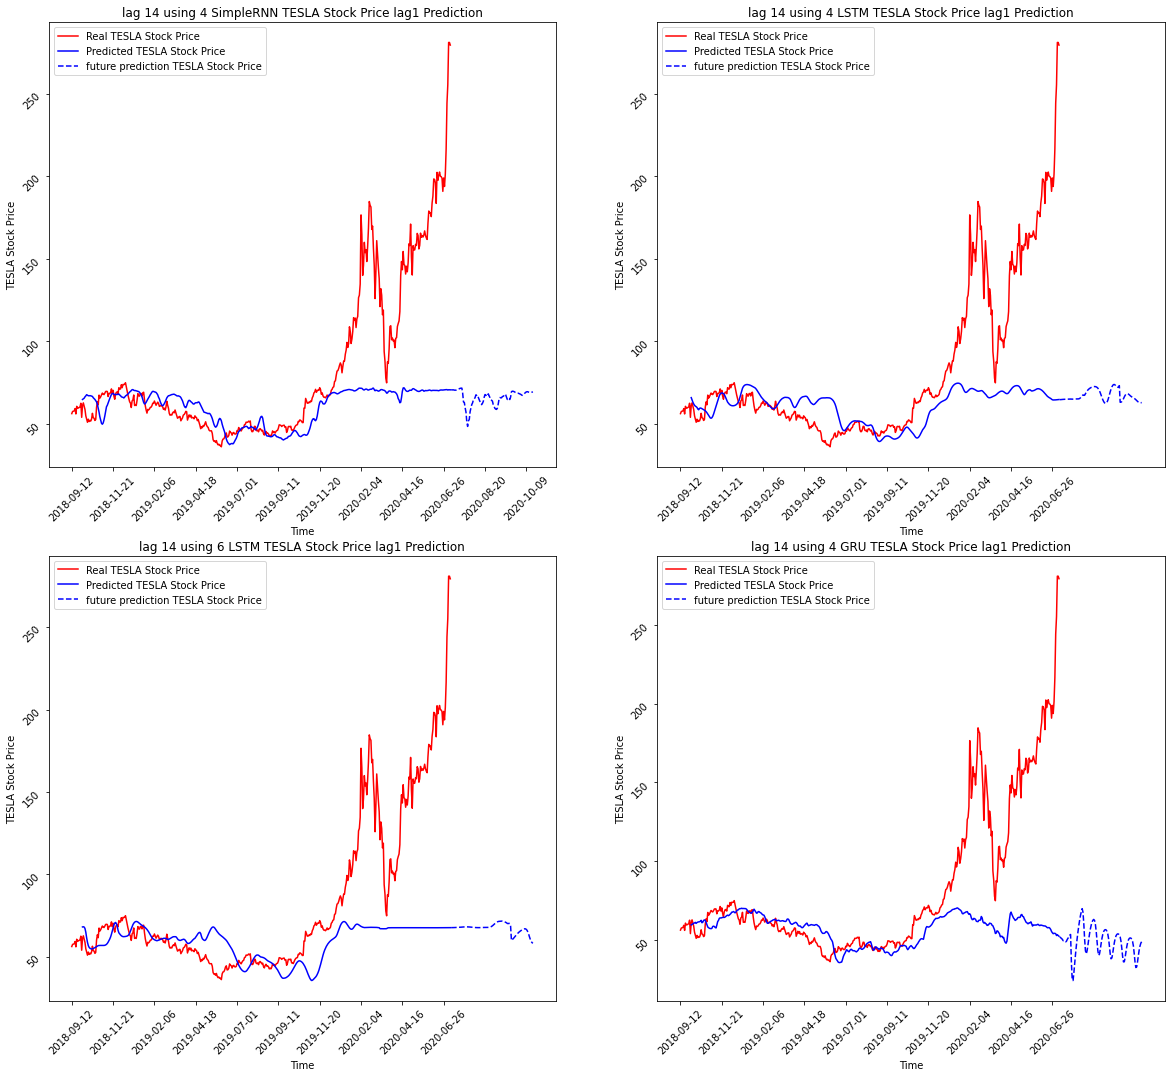

In [237]:
# Visualising the results
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,18))
axs[0,0].plot(df.loc[800:, 'Date'].tolist(), dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
axs[0,0].plot(df.loc[813:, 'Date'].tolist(), predicted_stock_price_14_RNN, color = 'blue', label = 'Predicted TESLA Stock Price')
axs[0,0].plot(date, future_14_RNN[459:], '--', color = 'blue',label = 'future prediction TESLA Stock Price')
axs[0,0].set_xticks(np.arange(0,559,50))
axs[0,0].set_title('lag 14 using 4 SimpleRNN TESLA Stock Price lag1 Prediction')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylabel('TESLA Stock Price')
axs[0,0].tick_params(labelrotation=45)
axs[0,0].legend()

axs[0,1].plot(df.loc[800:, 'Date'].tolist(), dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
axs[0,1].plot(df.loc[813:, 'Date'].tolist(), predicted_stock_price_14_4, color = 'blue', label = 'Predicted TESLA Stock Price')
axs[0,1].plot(date, future_14_4[459:], '--', color = 'blue',label = 'future prediction TESLA Stock Price')
axs[0,1].set_xticks(np.arange(0,459,50))
axs[0,1].set_title('lag 14 using 4 LSTM TESLA Stock Price lag1 Prediction')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylabel('TESLA Stock Price')
axs[0,1].tick_params(labelrotation=45)
axs[0,1].legend()

axs[1,0].plot(df.loc[800:, 'Date'].tolist(), dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
axs[1,0].plot(df.loc[813:, 'Date'].tolist(), predicted_stock_price_14_6, color = 'blue', label = 'Predicted TESLA Stock Price')
axs[1,0].plot(date, future_14_6[459:], '--', color = 'blue',label = 'future prediction TESLA Stock Price')
axs[1,0].set_xticks(np.arange(0,459,50))
axs[1,0].set_title('lag 14 using 6 LSTM TESLA Stock Price lag1 Prediction')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylabel('TESLA Stock Price')
axs[1,0].tick_params(labelrotation=45)
axs[1,0].legend()

axs[1,1].plot(df.loc[800:, 'Date'].tolist(), dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
axs[1,1].plot(df.loc[813:, 'Date'].tolist(), predicted_stock_price_14_GRU, color = 'blue', label = 'Predicted TESLA Stock Price')
axs[1,1].plot(date, future_14_GRU[459:], '--', color = 'blue',label = 'future prediction TESLA Stock Price')
axs[1,1].set_xticks(np.arange(0,459,50))
axs[1,1].set_title('lag 14 using 4 GRU TESLA Stock Price lag1 Prediction')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylabel('TESLA Stock Price')
axs[1,1].tick_params(labelrotation=45)
axs[1,1].legend()

### training time comparison

In [35]:
training_time = pd.DataFrame({
    'lag1': [time_model_1_RNN, time_model_1_4, time_model_1_6, time_model_1_GRU], 
    'lag7': [time_model_7_RNN, time_model_7_4, time_model_7_6, time_model_7_GRU], 
    'lag14': [time_model_14_RNN, time_model_14_4, time_model_14_6, time_model_14_GRU], 
}, index=['4*SimpleRNN', '4*LSTM', '6*LSTM', '4*GRU'])
# training_time.to_latex()

\begin{array}{|c|c|c|} \hline
{} &        lag1 &        lag7 &       lag14 \\ \hline
4*SimpleRNN &  265.985345 &  206.353891 &  142.953459 \\ \hline
4*LSTM      &  390.293636 &  390.111862 &  330.186210 \\ \hline
6*LSTM      &  577.824176 &  515.365424 &  470.694139 \\ \hline
4*GRU       &  511.080844 &  329.904193 &  329.164676 \\ \hline
\end{array}
